<a href="https://colab.research.google.com/github/m4a1carbin4/2022-ML_Term-project/blob/main/K_means_ver2_%2B_content_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.style as style
import seaborn as sn
import seaborn as sns
import sys
import warnings; warnings.simplefilter('ignore')

### Load data

In [ ]:
df = pd.read_csv("movies_metadata.csv")

df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [ ]:
# handle null values
df_numeric.isnull().sum()

budget            0
popularity        5
revenue           6
runtime         263
vote_average      6
vote_count        6
title             6
dtype: int64

In [ ]:
df_numeric.dropna(inplace=True)
df_numeric = df_numeric[df_numeric['vote_count']>30]
df_numeric.shape

(12178, 7)

### Normalize data

In [ ]:
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))
df_numeric_scaled = pd.DataFrame(minmax, index=df_numeric.index, columns=df_numeric.columns[:-1])

df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


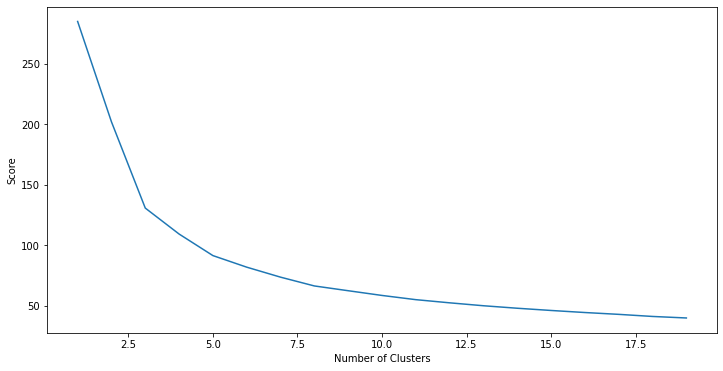

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for i in range(1,20):
    km = KMeans(
    n_clusters= i, init='k-means++',
    )
    km.fit(df_numeric_scaled) 
    inertia.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,20), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

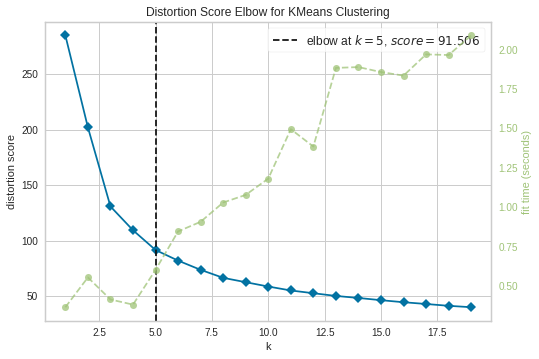

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(km, k=(1,20))
visualizer.fit(minmax)
visualizer.poof()

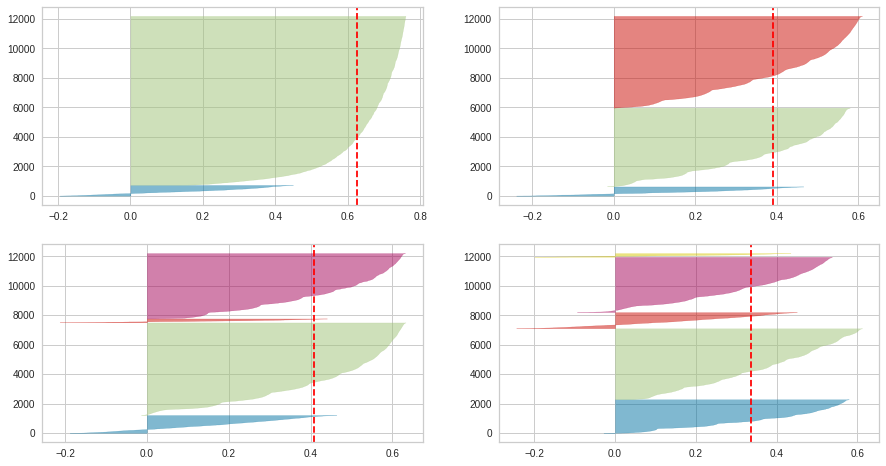

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_numeric_scaled)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)
df_numeric['cluster'] = kmeans.labels_

df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


In [ ]:
df_numeric.groupby(['cluster']) #.mean()

In [ ]:
print(df_numeric[df_numeric['cluster']==0])

         budget popularity     revenue  runtime  vote_average  vote_count  \
2             0    11.7129         0.0    101.0           6.5        92.0   
3      16000000   3.859495  81452156.0    127.0           6.1        34.0   
4             0   8.387519  76578911.0    106.0           5.7       173.0   
11            0   5.430331         0.0     88.0           5.7       210.0   
17      4000000   9.026586   4300000.0     98.0           6.5       539.0   
...         ...        ...         ...      ...           ...         ...   
45239         0   9.907026         0.0    110.0           6.2        72.0   
45331         0   2.541633         0.0     96.0           6.5        38.0   
45353         0   2.302582         0.0     92.0           5.9        33.0   
45373         0   9.222308         0.0     83.0           6.0        38.0   
45380         0   5.667067         0.0     83.0           6.2        37.0   

                              title  cluster  
2                  Grumpier 

In [ ]:
def _make_df_to_csv(raw_df,preprocessed_df): 
    # k : k로 클러스터링 된 Data
    for k in range(0,5):
        idx = preprocessed_df[preprocessed_df['cluster']==k].index
        print(idx)
        raw_df.iloc[idx].to_csv(f"{k}_th Cluster.csv",index = False)

In [ ]:
_make_df_to_csv(df,df_numeric)

Int64Index([    2,     3,     4,    11,    17,    20,    21,    23,    26,
               30,
            ...
            45031, 45036, 45048, 45145, 45149, 45239, 45331, 45353, 45373,
            45380],
           dtype='int64', length=4786)
Int64Index([   12,    13,    15,    16,    24,    25,    27,    28,    31,
               35,
            ...
            45168, 45171, 45174, 45204, 45206, 45225, 45254, 45258, 45265,
            45437],
           dtype='int64', length=3743)
Int64Index([    1,     5,     6,     9,    10,    14,    18,    19,    22,
               33,
            ...
            43190, 43231, 43238, 43294, 43644, 44021, 44303, 44337, 45014,
            45139],
           dtype='int64', length=1122)
Int64Index([    0,    46,   256,   292,   314,   351,   359,   475,   582,
              760,
            ...
            41536, 42170, 42171, 42222, 42235, 43255, 44009, 44274, 44678,
            44842],
           dtype='int64', length=260)
Int64Index([    7,     8,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def make_cluster_matrix(k):
  #Load Movie Data
  movie_data = pd.read_csv(f"{k}_th Cluster.csv")
  movie_data =  movie_data.loc[movie_data['original_language'] == 'en', :]
  movie_data = movie_data[['id', 'title', 'original_language', 'genres']]
  print(movie_data.shape)
  movie_data.head()

  #Load Movie Keywords Data
  movie_keyword = pd.read_csv('keywords.csv')
  print(movie_keyword.shape)
  movie_keyword.head()

  #Combin Movie + Keywords Data
  movie_data.id = movie_data.id.astype(int)
  movie_keyword.id = movie_keyword.id.astype(int)
  movie_data = pd.merge(movie_data, movie_keyword, on='id')
  print(movie_data.shape)
  movie_data.head()

  #Preprocessing Data (genres, keywords)
  movie_data['genres'] = movie_data['genres'].apply(literal_eval)
  movie_data['genres'] = movie_data['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))
  movie_data['keywords'] = movie_data['keywords'].apply(literal_eval)
  movie_data['keywords'] = movie_data['keywords'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))
  movie_data.head()


  #TF-IDF Vector make Vector Matrix table for Moive Data
  tfidf_vector = TfidfVectorizer()
  tfidf_matrix = tfidf_vector.fit_transform(movie_data['genres'] + " " + movie_data['keywords']).toarray()
  tfidf_matrix_feature = tfidf_vector.get_feature_names_out()
  tfidf_matrix.shape

  tfidf_matrix = pd.DataFrame(tfidf_matrix,columns=tfidf_matrix_feature, index = movie_data.title)
  print(tfidf_matrix.shape)
  tfidf_matrix.head()

  #Vector cosine_Similarity
  #%%time
  cosine_sim = cosine_similarity(tfidf_matrix)
  cosine_sim.shape

  cosine_sim_df = pd.DataFrame(cosine_sim, index = movie_data.title, columns = movie_data.title)
  print(cosine_sim_df.shape)
  cosine_sim_df.head()
  return cosine_sim_df, movie_data

#Function for return result of similarity searches (num = k, default=10)
def genre_recommendations(target_title, matrix, items, k=10):
    recom_idx = matrix.loc[:,target_title].values.reshape(1,-1).argsort()[:,::-1].flatten()[1:k+1]
    recom_title = items.iloc[recom_idx,:].title.values
    recom_genre = items.iloc[recom_idx,:].genres.values
    target_title_list = np.full(len(range(k)),target_title)
    target_genre_list = np.full(len(range(k)), items[items.title == target_title].genres.values)

    d = {
        'target_title':target_title_list,
        'target_genre':target_genre_list,
        'recom_title':recom_title,
        'recom_genre':recom_genre
    }

    return pd.DataFrame(d)

In [ ]:
df0 , mv0 = make_cluster_matrix(0);
df1 , mv1 = make_cluster_matrix(1);
df2 , mv2 = make_cluster_matrix(2);
df3 , mv3 = make_cluster_matrix(3);
df4 , mv4 = make_cluster_matrix(4);


(3837, 4)
(46419, 2)
(3875, 5)
(3875, 5882)
(3875, 3875)
(2364, 4)
(46419, 2)
(2381, 5)
(2381, 5403)
(2381, 2381)
(1105, 4)
(46419, 2)
(1109, 5)
(1109, 3801)
(1109, 1109)
(259, 4)
(46419, 2)
(261, 5)
(261, 1686)
(261, 261)
(2033, 4)
(46419, 2)
(2062, 5)
(2062, 3688)
(2062, 2062)


In [ ]:
df_list = [df0,df1,df2,df3,df4]
mv_list = [mv0,mv1,mv2,mv3,mv4]

In [ ]:
genre_recommendations('Dracula: Dead and Loving It', df_list[0], mv_list[0])

,target_title,target_genre,recom_title,recom_genre
0,Dracula: Dead and Loving It,Comedy Horror,Scars of Dracula,Horror
1,Dracula: Dead and Loving It,Comedy Horror,"What's Up, Tiger Lily?",Action Comedy
2,Dracula: Dead and Loving It,Comedy Horror,Taste the Blood of Dracula,Horror
3,Dracula: Dead and Loving It,Comedy Horror,Shadow of the Vampire,Drama Horror
4,Dracula: Dead and Loving It,Comedy Horror,Batman vs Dracula,Fantasy Animation Horror Action Thriller Scien...
5,Dracula: Dead and Loving It,Comedy Horror,Detention,Horror Comedy Science Fiction
6,Dracula: Dead and Loving It,Comedy Horror,Dracula,Horror Romance
7,Dracula: Dead and Loving It,Comedy Horror,Dracula: Prince of Darkness,Horror
8,Dracula: Dead and Loving It,Comedy Horror,Bad Milo,Comedy Horror
9,Dracula: Dead and Loving It,Comedy Horror,The Horribly Slow Murderer with the Extremely ...,Comedy Horror
